In [124]:
### Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [17]:
df = pd.read_excel(r'C:\Users\USER\Desktop\SQL and Excel Files\Excel files\superstore_sales.xlsx')

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [21]:
### Shape of the dataset

df.shape

(51290, 21)

In [22]:
### A concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [23]:
### Checking for missing values

df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [24]:
### Getting descriptive statistics summary

df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


### EDA

### What are the overall sales trends?

In [25]:
### Getting the month_year from dataset

df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [37]:
trend = df.groupby('month_year')['sales'].sum().reset_index()

trend

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


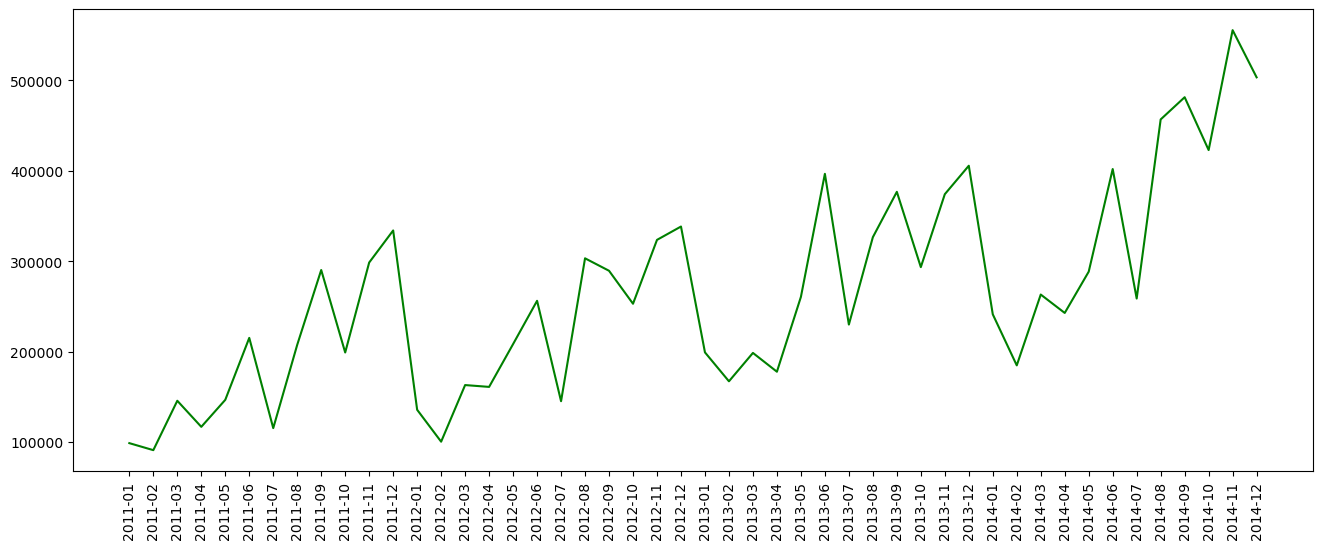

In [125]:
plt.figure(figsize = (16, 6))
plt.plot(trend['month_year'], trend['sales'], color = 'g')
plt.xticks(rotation = 'vertical')

plt.show()

### Which are the top 10 products by sales?

In [60]:
### Grouping product name column

prod_sale = pd.DataFrame(df.groupby('product_name')['sales'].sum())

In [64]:
### Sorting prod_sale column

prod_sale = prod_sale.sort_values('sales', ascending = False)

prod_sale

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


In [65]:
### Top 10 products by sale

prod_sale.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Which are the most selling products?

In [68]:
most_sell_prod = pd.DataFrame(df.groupby('product_name')['quantity'].sum())

In [71]:
### Sorting most_sell_prod column

most_sell_prod = most_sell_prod.sort_values('quantity', ascending = False)

In [72]:
most_sell_prod.head(5)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


### What is the most preferred ship mode?

In [74]:
### Checking unique values

pd.DataFrame(df['ship_mode'].unique())

,0
0,Standard Class
1,Second Class
2,Same Day
3,First Class


In [113]:
df['count'] = 1

result = df.groupby('ship_mode').count().reset_index()[['ship_mode', 'count']]

result

,ship_mode,count
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


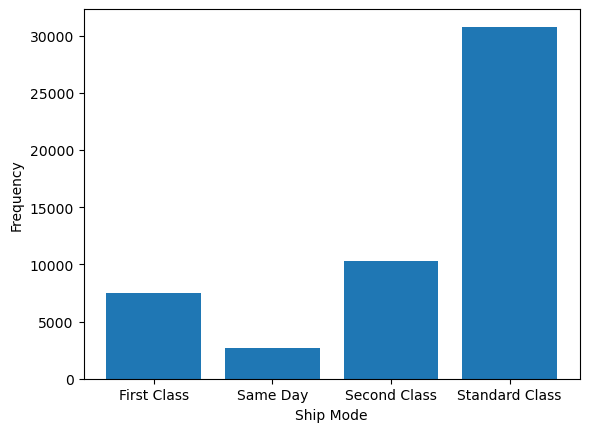

In [126]:
plt.bar(result['ship_mode'], result['count'])

plt.xlabel('Ship Mode')
plt.ylabel('Frequency')

plt.show()

### Standard Class is the most preferred ship mode